In [7]:
import mxnet as mx
from mxnet import nd
from mxnet.contrib.ndarray import MultiBoxPrior
import matplotlib.pyplot as plt

In [4]:
def box_to_rect(box, color, linewidth=3):
    """convert an anchor box to a matplotlib rectangle"""
    box = box.asnumpy()
    return plt.Rectangle(
        (box[0], box[1]), (box[2]-box[0]), (box[3]-box[1]),
        fill=False, edgecolor=color, linewidth=linewidth)


[[[-0.1125     -0.1125      0.1375      0.1375    ]
  [-0.0625     -0.0625      0.08750001  0.08750001]
  [-0.0375     -0.0375      0.0625      0.0625    ]
  ...
  [ 0.9375      0.9375      1.0375      1.0375    ]
  [ 0.8107233   0.8991117   1.1642767   1.0758884 ]
  [ 0.8991117   0.8107233   1.0758884   1.1642767 ]]]
<NDArray 1x8000x4 @cpu(0)>
The first anchor box at row, col: 20 20 
[15.5 15.5 25.5 25.5]
<NDArray 4 @cpu(0)>
Anchor boxes
[15.5 15.5 25.5 25.5]
[17.5 17.5 23.5 23.5]
[18.5 18.5 22.5 22.5]
[13.428931 16.964466 27.571068 24.035532]
[16.964466 13.428931 24.035532 27.571068]


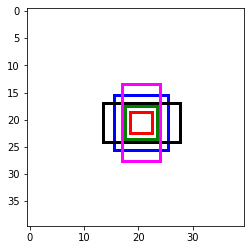

In [37]:
    n = 40
    x_min = 20
    y_min = 20
    
    # shape: batch x channel x height x weight
    x = nd.random_uniform(shape=(1, 3, n, n))
    y = MultiBoxPrior(x, sizes=[.25, .15, .1], ratios=[1, 2, .5])
#     y = MultiBoxPrior(x, sizes=[.5, .25, .1], ratios=[1, 2, .5])

    print(y)
    # the first anchor box generated for pixel at (20,20)
    # its format is (x_min, y_min, x_max, y_max)
    boxes = y.reshape((n, n, -1, 4))
    print('The first anchor box at row, col:', y_min, x_min, n*boxes[y_min, x_min, 0, :])
    colors = ['blue', 'green', 'red', 'black', 'magenta']
    plt.imshow(nd.ones((n, n, 3)).asnumpy())
    anchors = boxes[y_min, x_min, :, :]
    print('Anchor boxes')
    for i in range(anchors.shape[0]):
        print((anchors[i,:] * n).asnumpy())
        plt.gca().add_patch(box_to_rect(anchors[i,:]*n, colors[i]))
    plt.show()